# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

---


## I. Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## II. Loading data with Pandas

We need to load `Test_data.csv` and `pharma_data.csv` into individual dataframes so that we can work with them in Python

In [2]:
#Importing datasets
pharma_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")
Test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")

Looking at the first 5 rows of both dataframes to see what the data looks like

In [3]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
Test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


With the `pharma_data.csv`, we have a mix of numeric, categorical data and null values which we will need to transform before modelling.

---

## III. Descriptive statistics of data

### Data types

In [5]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [6]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


The describe method gives us a lot of information about the data. The key point to take away from this is that we some  data, as exhibited by std

### Missing Values

In [7]:
#Checking for null values
pharma_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

Here, we can see that a handful of columns has null values present.

In [8]:
# Filling null values with the next value on the column
pharma_data.Treated_with_drugs.fillna(method = "pad",inplace = True)
pharma_data.A.fillna(method = "pad",inplace = True)
pharma_data.B.fillna(method = "pad",inplace = True)
pharma_data.C.fillna(method = "pad",inplace = True)
pharma_data.D.fillna(method = "pad",inplace = True)
pharma_data.E.fillna(method = "pad",inplace = True)
pharma_data.F.fillna(method = "pad",inplace = True)
pharma_data.Z.fillna(method = "pad",inplace = True)

In [9]:
# Summing all our columns and using those values as Number_of_prev
cols = pharma_data[["A","B","C","D","E","F","Z"]]
cols = cols.sum(axis = 1)
pharma_data.Number_of_prev_cond = cols

In [10]:
#Now there are no null values
pharma_data.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

---
## IIII. Data visualization

Now let's create meaning and conclusions from the dataframes

### 1. Percentage of Survival

In [11]:
survived = pharma_data[["ID_Patient_Care_Situation","Survived_1_year"]]
survived.columns = ["Patients","Survived"]
survived_total = survived.groupby(["Survived"]).count().sort_values(by = "Patients",ascending=False)
survived_percent = (survived_total/survived_total.sum())*100
survived_percent

,Patients
Survived,
1,63.224661
0,36.775339


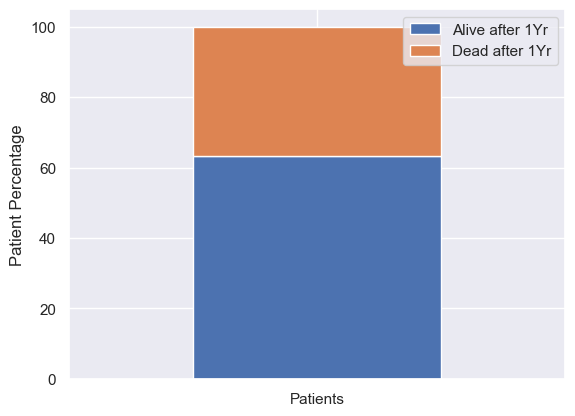

In [12]:
survived_percent.transpose().plot.bar(stacked = True,rot = 0)
plt.ylabel("Patient Percentage")
plt.legend(["Alive after 1Yr","Dead after 1Yr"],loc = "upper right")
plt.show()

About 36% of the total number are dead (8934 patients)


### 2. Patients who smoke

Let's see the distribution of the patients who smoke. Since the  data is uni-variate, let's use histograms to visualize their distribution.

In [13]:
#There are rows that indicate "Cannot Say". Let's convert all the "Cannot Say" categories to YES OR NO
pharma_data.Patient_Smoker.replace("Cannot say","YES",inplace = True)
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX1,128,1.348400,YES,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [14]:
smokers = pharma_data[["ID_Patient_Care_Situation","Patient_Smoker","Survived_1_year"]]
smokers.columns = ["id","Patient_Smoker","Survived"]
smoker_total = smokers.groupby([smokers["Patient_Smoker"],smokers["Survived"]])["id"].count().unstack()
smoker_percent =  (smoker_total.div(smoker_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = False)
smoker_percent

Survived,0,1
Patient_Smoker,,
YES,50.908537,49.091463
NO,26.264533,73.735467


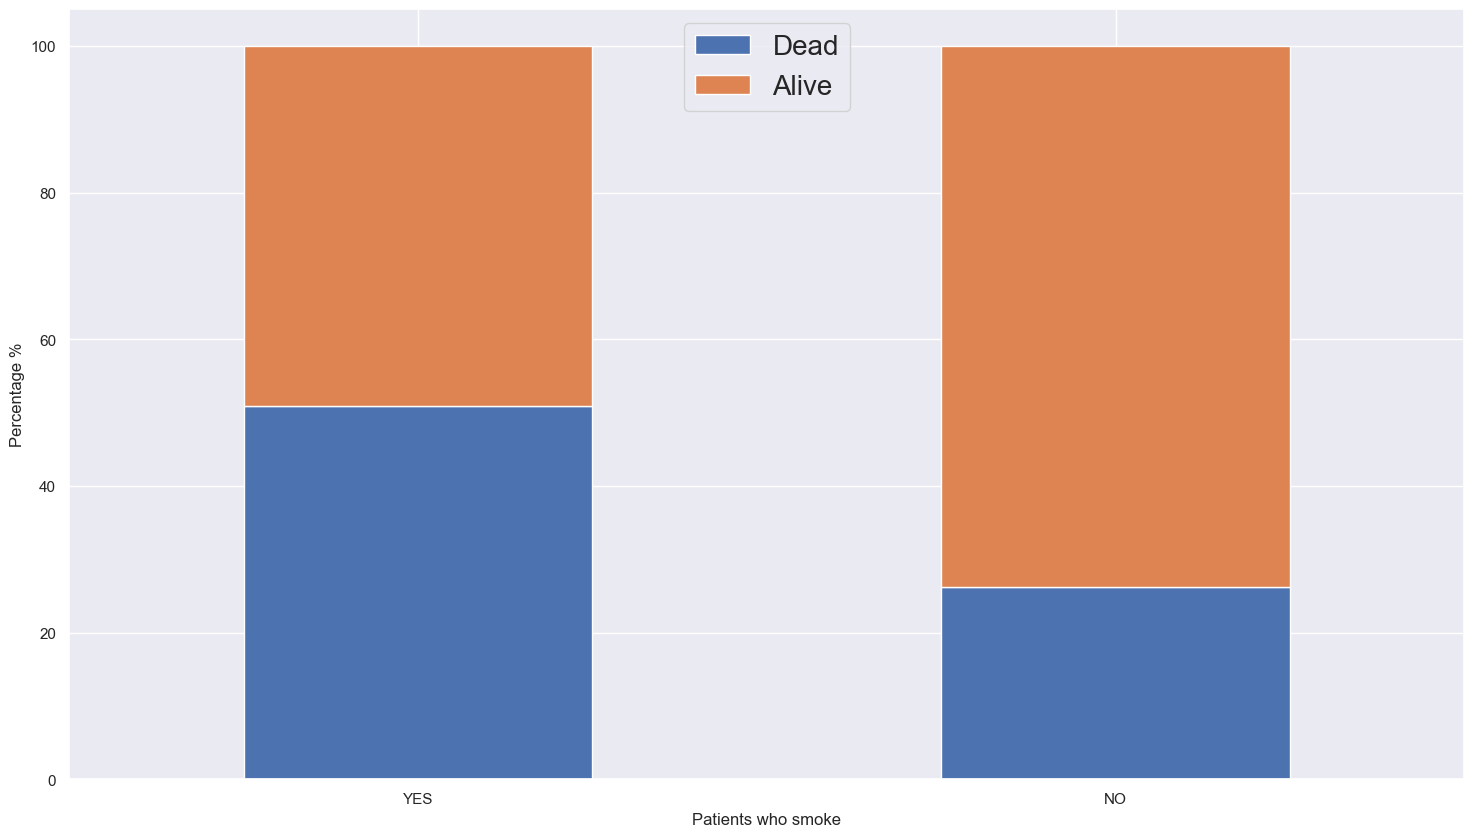

In [15]:
smoker_percent.plot.bar(stacked = True,rot =0,figsize=(18,10))
plt.ylabel("Percentage %")
plt.xlabel("Patients who smoke")
plt.legend(["Dead","Alive"],loc = "upper center",fontsize =20)
plt.show()

Smoking doesn't affect the rate of a patient's survival that much
 - 49% of smokers died as 51% of the same smokers survived
 - 26% of non-smokers dies as 73% of the same non-smokers survived

### 3. RURAL or URBAN community

In [16]:
Rural_urban = pharma_data[["ID_Patient_Care_Situation","Patient_Rural_Urban","Survived_1_year"]]
Rural_urban.columns = ["id","Patient_Rural_Urban","Survival"]
Rural_urban_total = Rural_urban.groupby([Rural_urban["Patient_Rural_Urban"],Rural_urban["Survival"]])["id"].count().unstack()
Rural_urban_percent = (Rural_urban_total.div(Rural_urban_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = False)
Rural_urban_percent

Survival,0,1
Patient_Rural_Urban,,
URBAN,45.052420,54.947580
RURAL,33.203173,66.796827


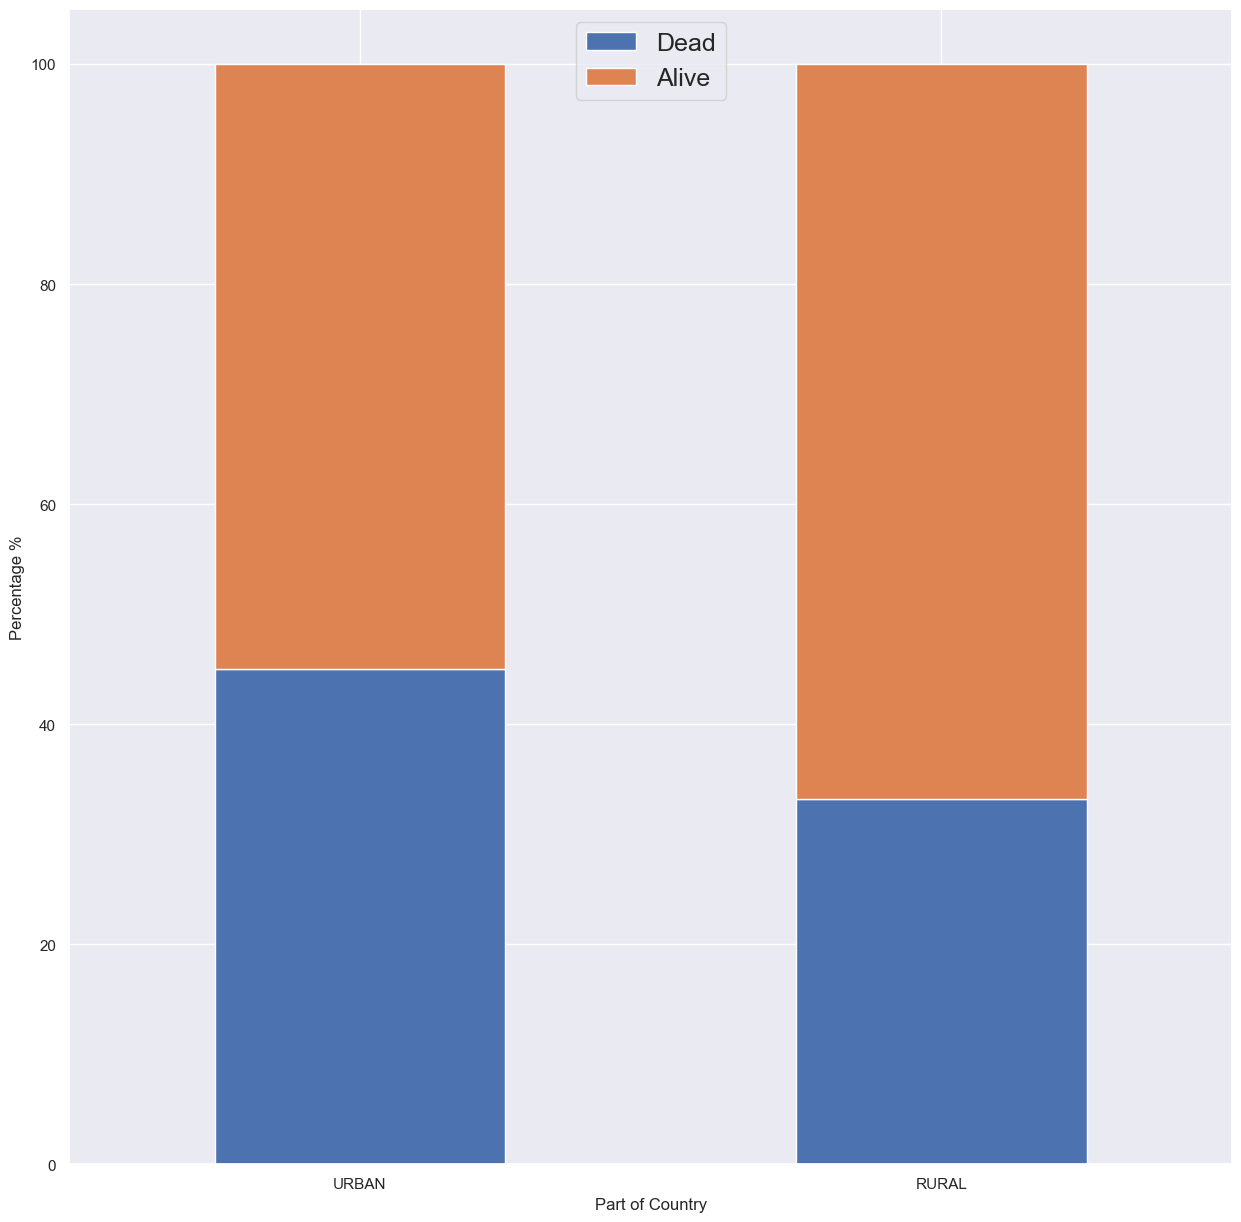

In [17]:
Rural_urban_percent.plot.bar(stacked = True,rot = 0,figsize=(15,15))
plt.legend(["Dead","Alive"],loc = "upper center",fontsize =18)
plt.ylabel("Percentage %")
plt.xlabel("Part of Country")
plt.show()

Rural
- 66% of Rural Residents survived
- 33% of Urban Residents died

Urban
- 54% of Urban Residents survived
- 45% of Urban Residents died


### 4. Patients with previous category of condition

In [18]:
Prev_con = pharma_data[["ID_Patient_Care_Situation","Number_of_prev_cond","Survived_1_year"]]
Prev_con.columns = ["id","Previous_con","Survival"]
Prev_con_total = Prev_con.groupby([Prev_con["Previous_con"],Prev_con["Survival"]])["id"].count().unstack()
Prev_con_percent = (Prev_con_total.div(Prev_con_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = True)
Prev_con_percent

Survival,0,1
Previous_con,,
1.0,34.208673,65.791327
2.0,36.542508,63.457492
3.0,41.757898,58.242102
4.0,59.761905,40.238095
5.0,94.594595,5.405405


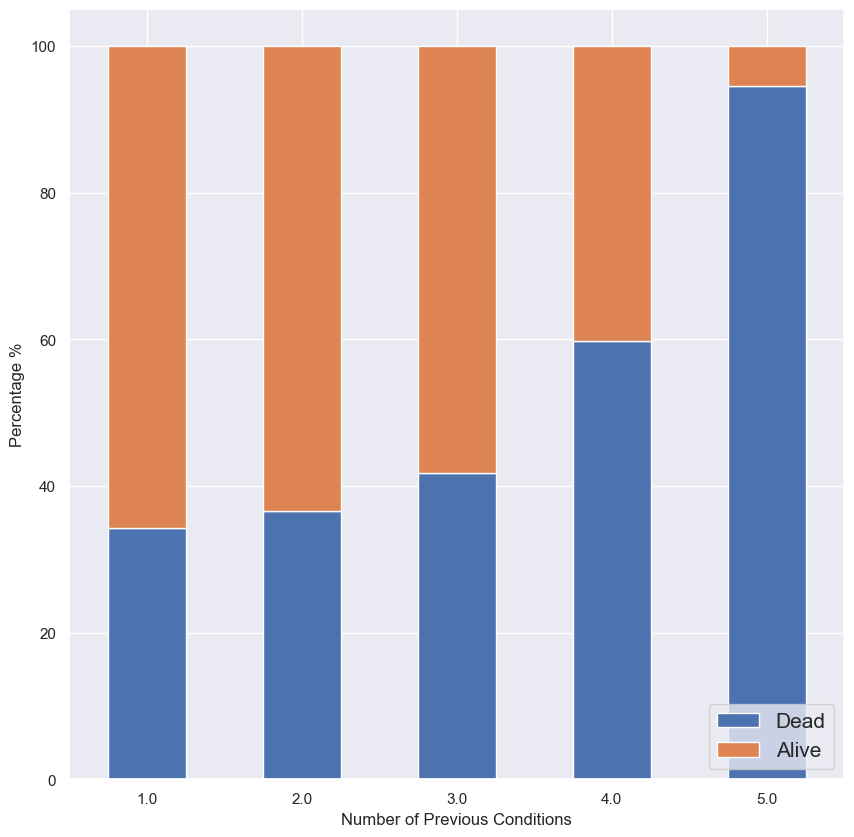

In [19]:
Prev_con_percent.plot.bar(stacked = True,rot = 0,figsize=(10,10))
plt.legend(["Dead","Alive"],loc = "lower right",fontsize = 15)
plt.ylabel("Percentage %")
plt.xlabel("Number of Previous Conditions")
plt.show()


---
This clearly shows the relationship between number of previous conditions and rate of survival
The more the number of previous conditions, the more the rate to death
- 94% of those with 5 previous conditions died
- 59% of those with 4 previous conditions died
- 41% of those with 3 previous conditions died
- 36% of those with 2 previous conditions died
- 34% of those with 1 previous condition died


### 5. Different Category of Previous Conditions

In [20]:
cat_prev_condition = pharma_data[["ID_Patient_Care_Situation","A","B","C","D","E","F","Z"]]
cat_prev_condition = cat_prev_condition.replace(0,np.nan)
cat_prev_condition["Survival"] = pharma_data.Survived_1_year
cat_prev_condition

,ID_Patient_Care_Situation,A,B,C,D,E,F,Z,Survival
0,22374,1.0,NaN,NaN,NaN,1.0,NaN,NaN,0
1,18164,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,6283,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5339,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,33012,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
23092,15613,1.0,1.0,NaN,1.0,1.0,1.0,NaN,0
23093,15503,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
23094,2167,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
23095,31646,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1


In [21]:

a = cat_prev_condition.groupby([cat_prev_condition["A"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
b = cat_prev_condition.groupby([cat_prev_condition["B"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
c = cat_prev_condition.groupby([cat_prev_condition["C"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
d = cat_prev_condition.groupby([cat_prev_condition["D"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
e = cat_prev_condition.groupby([cat_prev_condition["E"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
f = cat_prev_condition.groupby([cat_prev_condition["F"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
z = cat_prev_condition.groupby([cat_prev_condition["Z"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()

In [22]:
a_percent = (a.div(a.sum(axis = 1),axis = 0)*100)
b_percent = (b.div(b.sum(axis = 1),axis = 0)*100)
c_percent = (c.div(c.sum(axis = 1),axis = 0)*100)
d_percent = (d.div(d.sum(axis = 1),axis = 0)*100)
e_percent = (e.div(e.sum(axis = 1),axis = 0)*100)
f_percent = (f.div(f.sum(axis = 1),axis = 0)*100)
z_percent = (z.div(z.sum(axis = 1),axis = 0)*100)

In [23]:
a_percent.index = ["A"]
b_percent.index = ["B"]
c_percent.index = ["C"]
d_percent.index = ["D"]
e_percent.index = ["E"]
f_percent.index = ["F"]
z_percent.index = ["Z"]

In [24]:
sets = [a_percent,b_percent,c_percent,d_percent,e_percent,f_percent,z_percent]
result = pd.concat(sets)
result

Survival,0,1
A,37.549426,62.450574
B,42.393380,57.606620
C,39.812646,60.187354
D,53.042122,46.957878
E,35.713500,64.286500
F,36.237785,63.762215
Z,NaN,100.000000


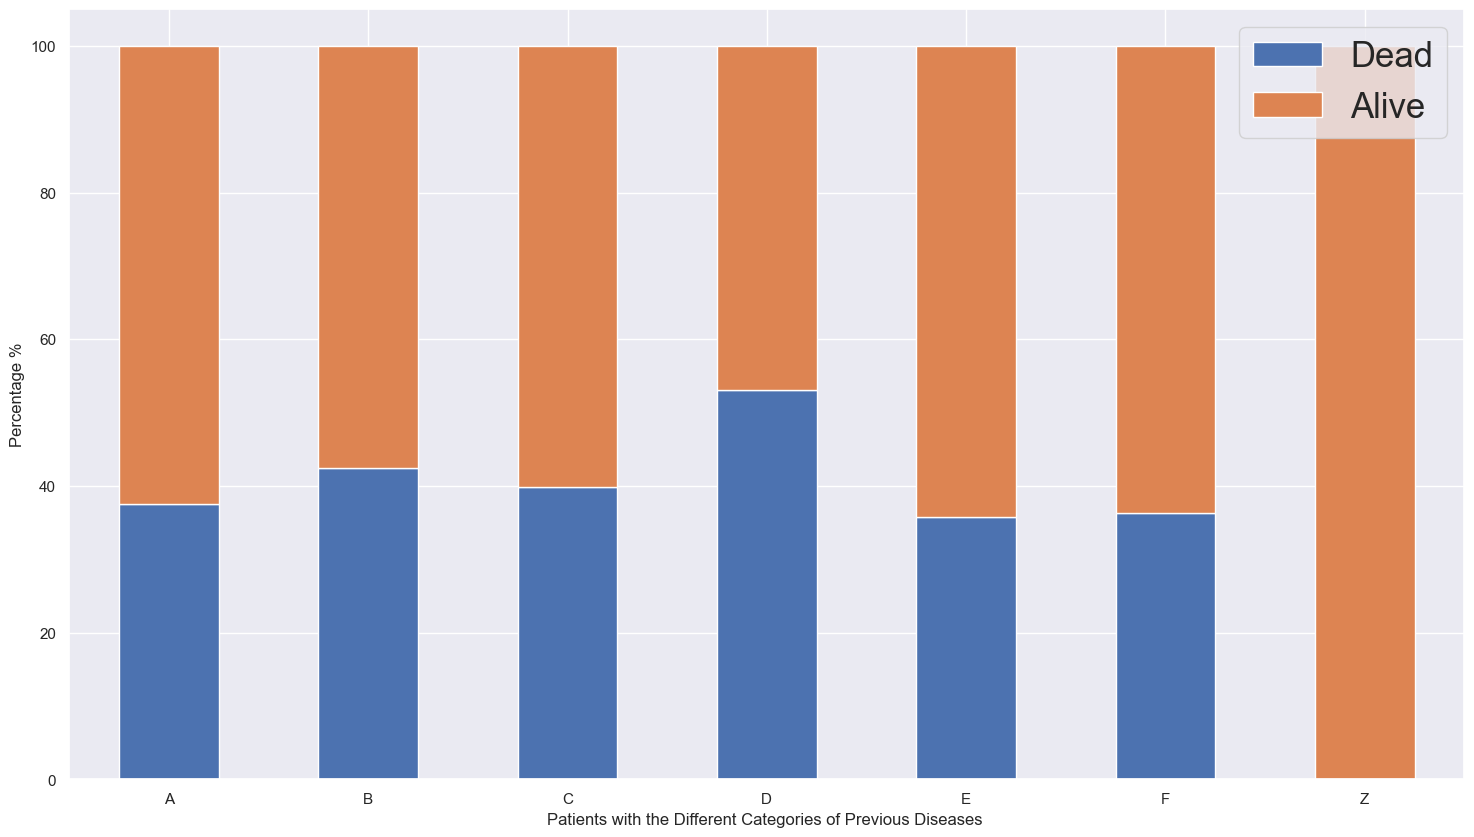

In [25]:
result.plot.bar(stacked = True,rot = 0,figsize=(18,10))
plt.legend(["Dead","Alive"],loc = "upper right",fontsize =25)
plt.ylabel("Percentage %")
plt.xlabel("Patients with the Different Categories of Previous Diseases ")
plt.show()

### 7.Treated with Drugs

In [26]:
drugs = pharma_data[["ID_Patient_Care_Situation","Treated_with_drugs","Survived_1_year"]]
drugs.columns = ["id","drugs","Survival"]
drugs_total = drugs.groupby([drugs["drugs"],drugs["Survival"]])["id"].count().unstack()
drugs_percent = (drugs_total.div(drugs_total.sum(axis = 1),axis = 0)*100).sort_values(by = 1,ascending = False)
drugs_percent

Survival,0,1
drugs,,
DX1 DX2 DX3 DX4 DX5,NaN,100.000000
DX1 DX4 DX5,6.250000,93.750000
DX1 DX5,11.691542,88.308458
DX2 DX4 DX5,14.285714,85.714286
DX1 DX2 DX3 DX5,14.285714,85.714286
DX1 DX3 DX5,14.851485,85.148515
DX3 DX5,14.987715,85.012285
DX2 DX3 DX5,16.483516,83.516484
DX3 DX4 DX5,16.494845,83.505155


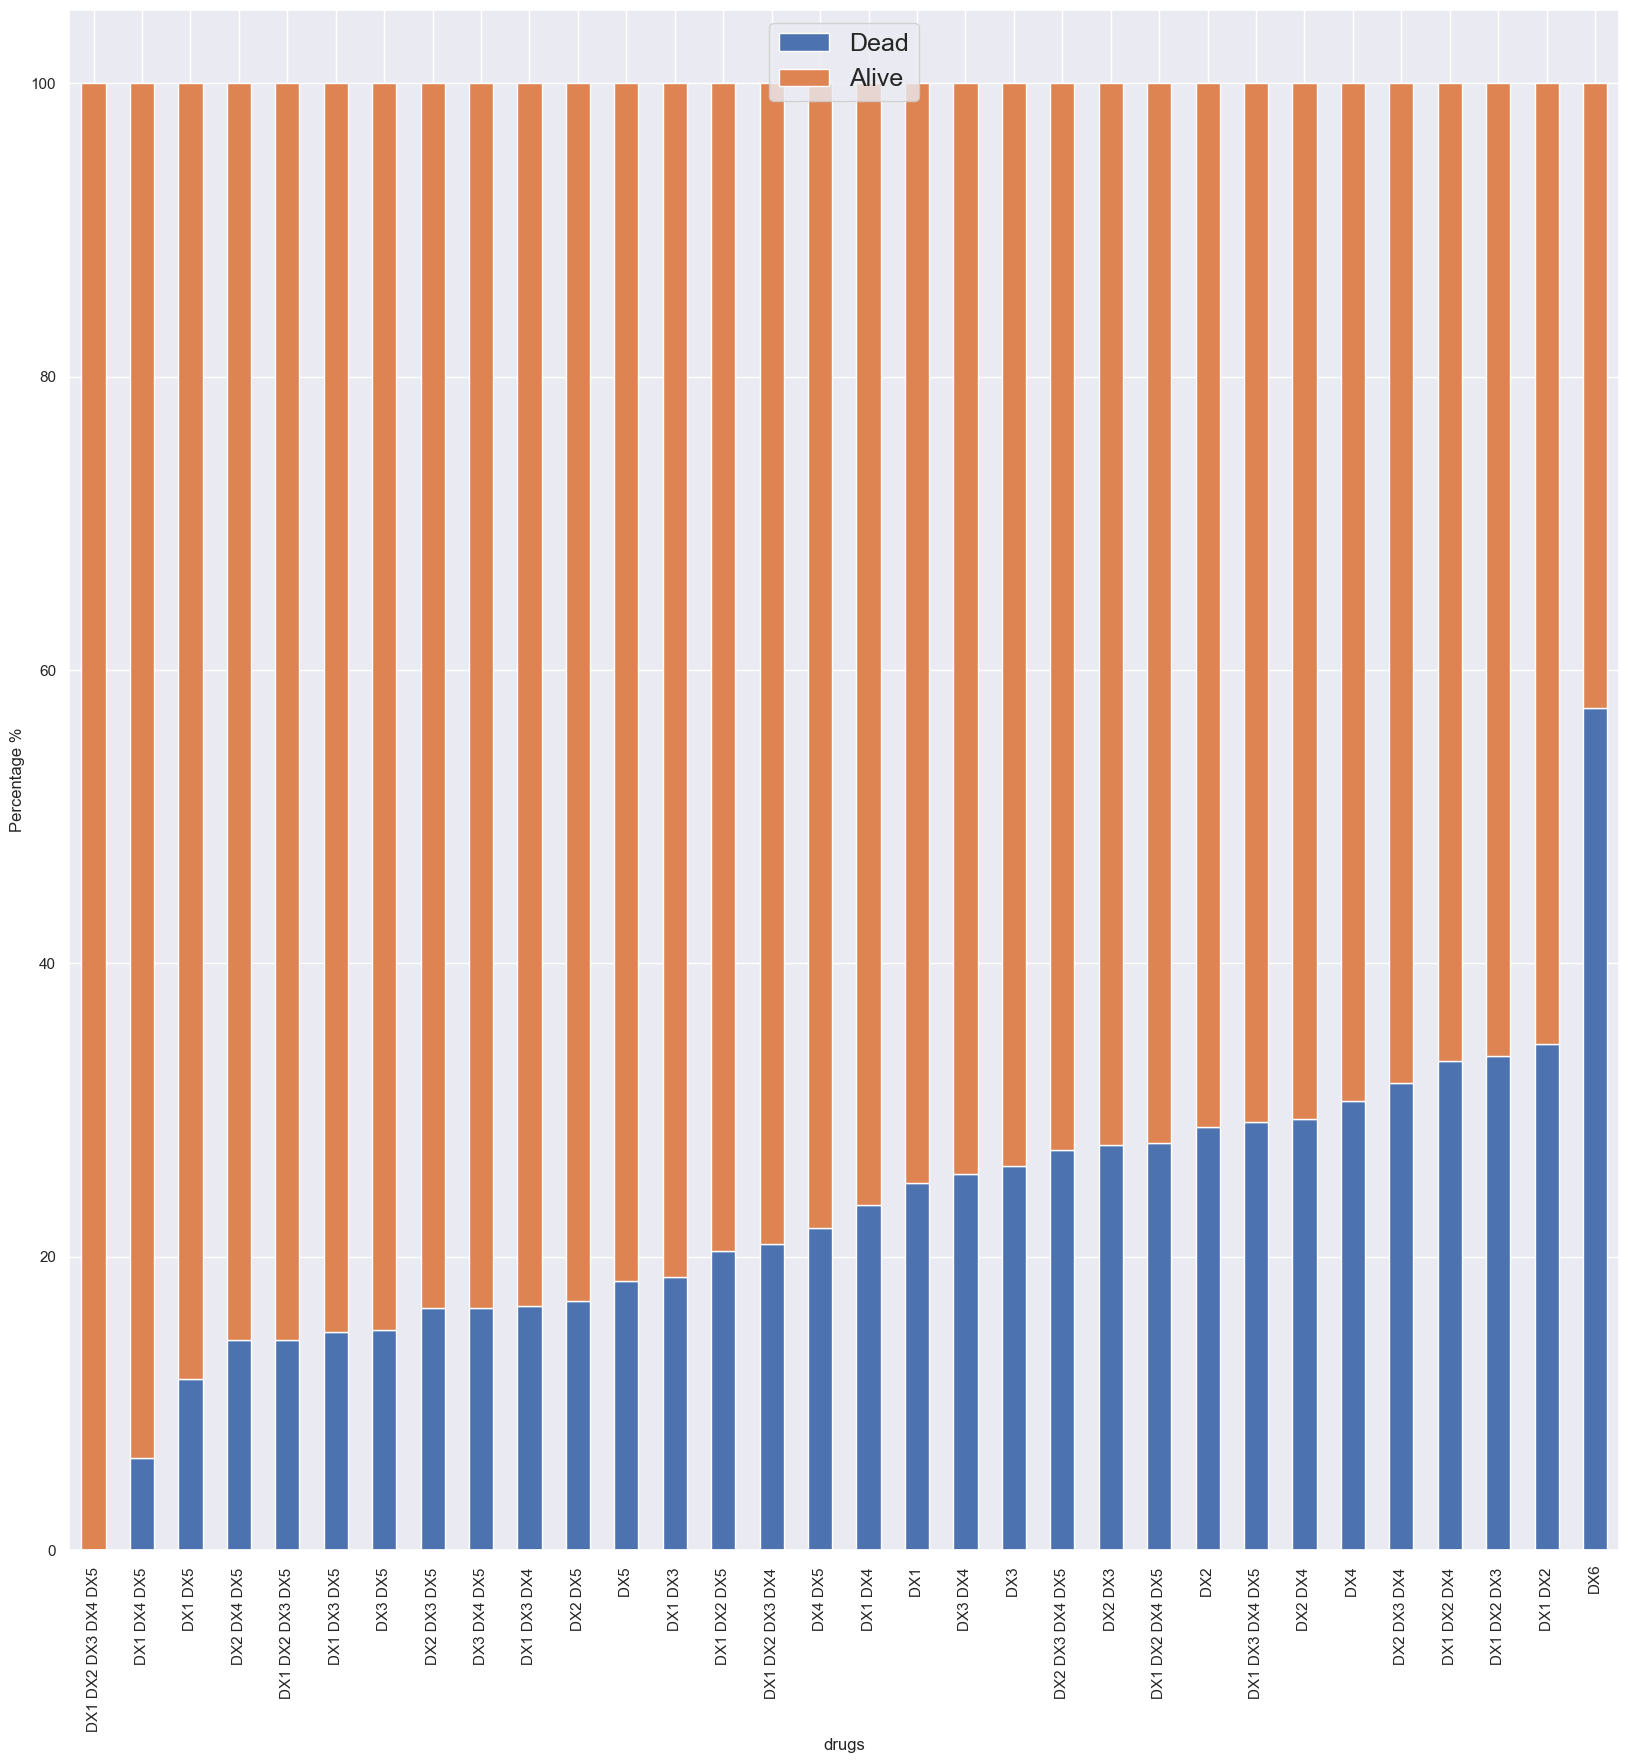

In [27]:
drugs_percent.plot.bar(stacked=True, rot="vertical", figsize=(20, 20))
plt.legend(["Dead", "Alive"], loc="upper center", fontsize=18)
plt.ylabel("Percentage %")
plt.xlabel("drugs")
plt.show()

Class of drugs used during treatment
- DX1 has 74% of Survivors
- DX2 has 71% of Survivors
- DX3 has 73% of Survivors

FOR DRUG COMBINATIONS the top 3 contributors of survivors are;

- DX1,DX2,DX3,DX4,DX5 has 100% survivors
- DX1,DX4,DX5 has 93% survivors
- DX2,DX5 has 88% survivors

### 6. Patient Age

In [28]:
age_pd = pharma_data[["ID_Patient_Care_Situation","Patient_Age","Survived_1_year"]]
age_pd.columns = ["id","Age","Survival"]
age = pd.DataFrame({"Survived":age_pd[age_pd["Survival"]==1]["Age"],
                     "Died":age_pd[age_pd["Survival"]==0]["Age"]

})
age

,Survived,Died
0,NaN,56.0
1,36.0,NaN
2,NaN,48.0
3,5.0,NaN
4,128.0,NaN
...,...,...
23092,NaN,14.0
23093,55.0,NaN
23094,NaN,63.0
23095,25.0,NaN


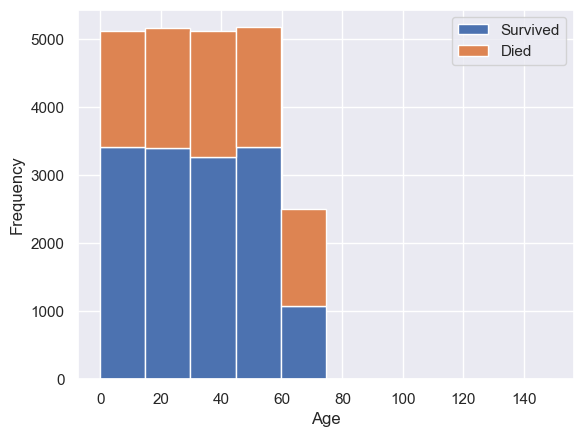

In [29]:
age[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Age")
plt.show()

In [30]:
#We will annotate to see which condition has the most survivors

### 8. Body Mass Ratio

In [31]:
bmr = pharma_data[["ID_Patient_Care_Situation","Patient_Body_Mass_Index","Survived_1_year"]]
bmr.columns = ["id","Patient_Body_Mass_Index","Survival"]
new = pd.DataFrame({"Survived":bmr[bmr["Survival"]==1]["Patient_Body_Mass_Index"],
                     "Died":bmr[bmr["Survival"]==0]["Patient_Body_Mass_Index"]

                     })
new

,Survived,Died
0,NaN,18.479385
1,22.945566,NaN
2,NaN,27.510027
3,19.130976,NaN
4,1.348400,NaN
...,...,...
23092,NaN,18.643448
23093,23.684585,NaN
23094,NaN,27.500039
23095,23.719125,NaN


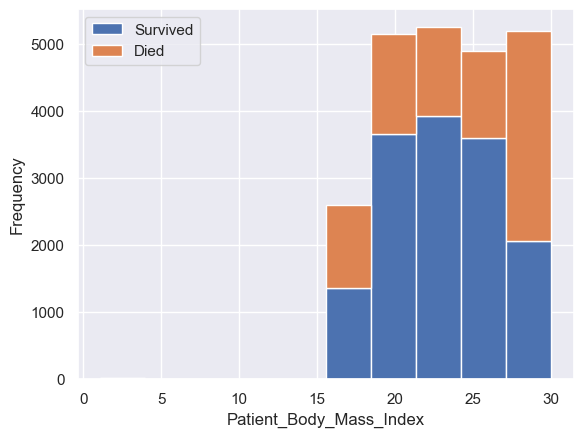

In [32]:
new[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Patient_Body_Mass_Index")
plt.show()

Clearly,`Patient_Body_Mass_Index` and `Patient_Age`data is highly negatively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the left are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

[]

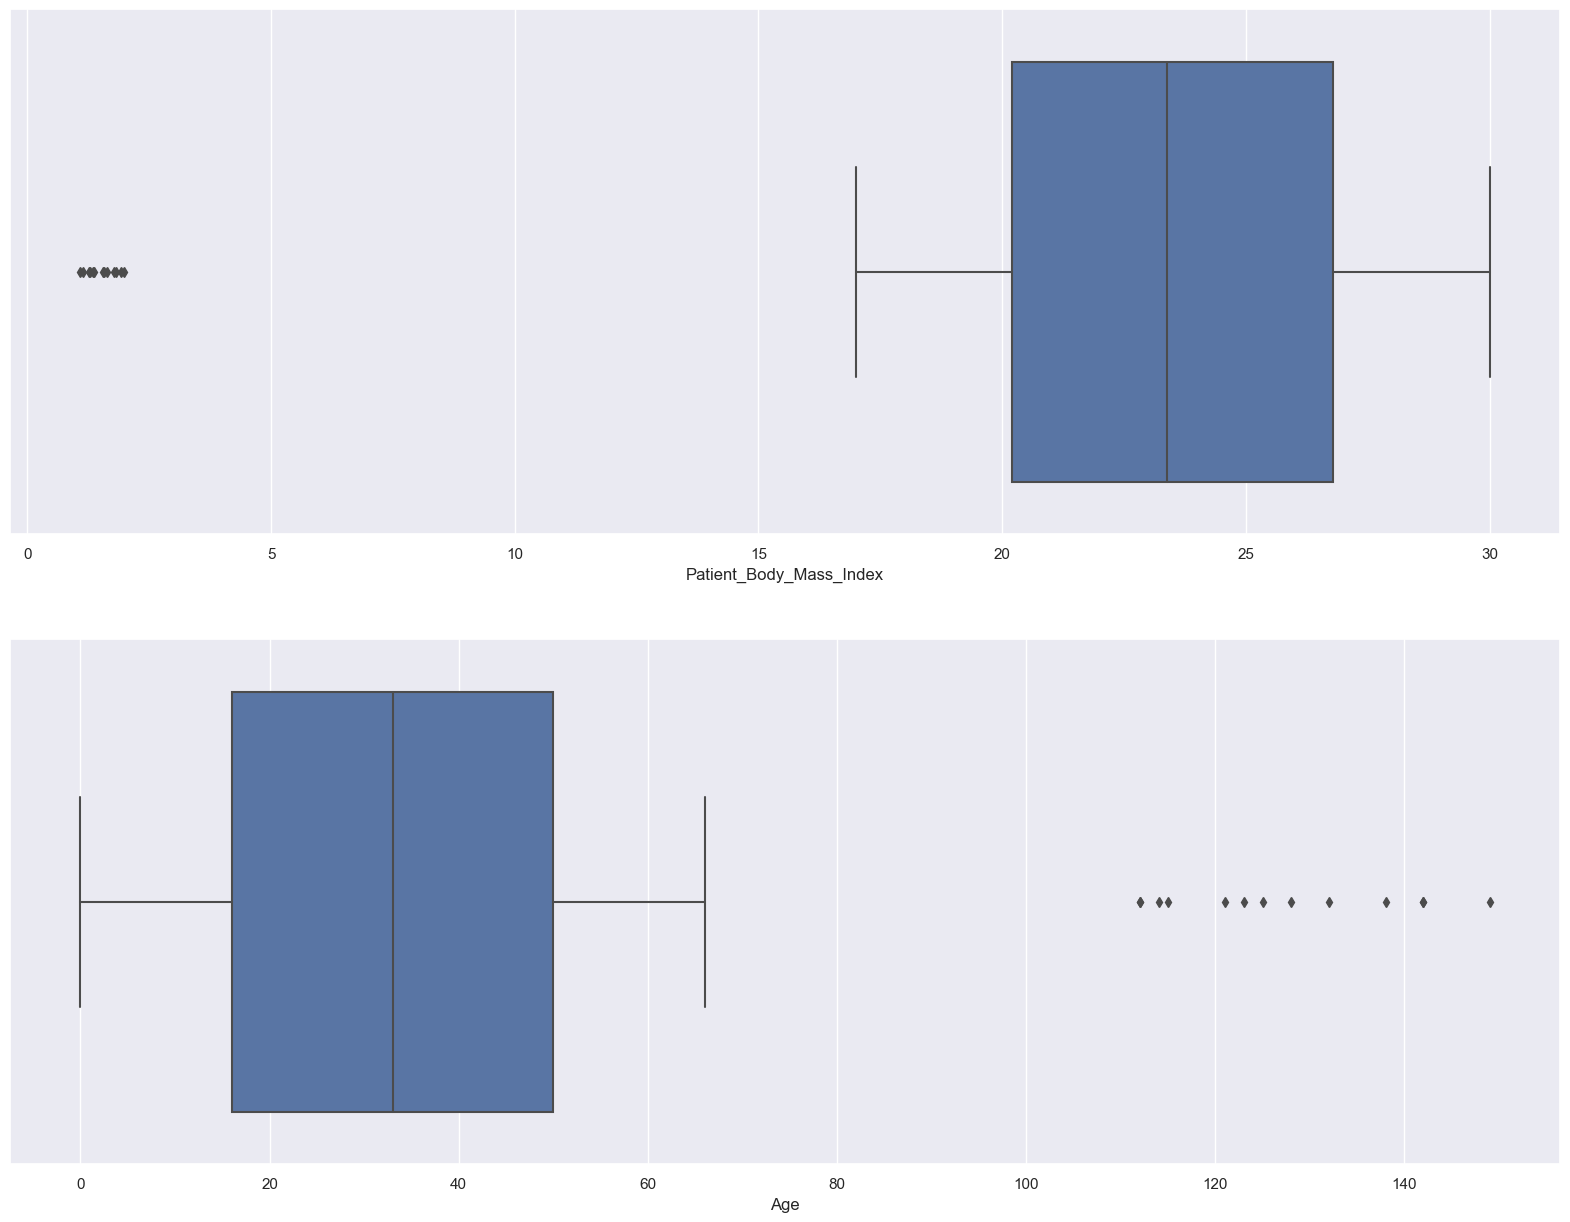

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Plotting a boxplot
fig, axs = plt.subplots(nrows=2, figsize=(20,15))
sns.boxplot(bmr["Patient_Body_Mass_Index"],ax=axs[0])
sns.boxplot(age_pd["Age"],ax=axs[1])
plt.plot()

Looks like there are outliers and skewness, and we will deal with them in the feature engineering